# Bayes Decision Rule
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the calculation of **likelihood** of each features given particular class 
- implement the calculation of **posterior** of each class given particular feature
- implement the calculation of **minimal total risk** of bayes decision rule

In [4]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [5]:
data = sio.loadmat('data.mat')
x1_train, x1_test, x2_train, x2_test = data['x1_train'], data['x1_test'], data['x2_train'], data['x2_test']
all_x = np.concatenate([x1_train, x1_test, x2_train, x2_test], 1)
data_range = [np.min(all_x), np.max(all_x)]

In [37]:
from get_x_distribution import get_x_distribution

train_x = get_x_distribution(x1_train, x2_train, data_range)
test_x = get_x_distribution(x1_test, x2_test, data_range)

print data_range
print train_x

[-6, 12]
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   8.  62. 133. 128.
   61.   6.   1.   0.   0.]
 [  1.   3.   3.   9.  13.  45.  57.  71.  98.  98.  99. 104.  77.  54.
   30.  17.  14.   4.   3.]]


## Part 1 likelihood
Your code for this section will be written inside **bayes_decision_rule/likehood.py**. 

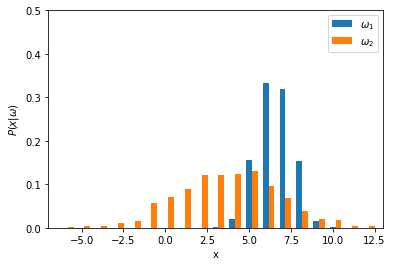

In [14]:
from likelihood import likelihood

l = likelihood(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), l.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, l.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(x|\omega)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 0.5])
plt.show()

In [36]:
#TODO
#compute the number of all the misclassified x using maximum likelihood decision rule

# begin answer
C,N = test_x.shape
l_predict = np.zeros(N)
test_err = np.zeros(C)

for j in range(N):
    if l[0][j] > l[1][j]:
        l_predict[j] = 1  # if P(x|w1)>P(x|w2), choose w1
    else:
        l_predict[j] = 2  # if P(x|w2)>P(x|w1), choose w2

C1,N1 = x1_test.shape
C2,N2 = x2_test.shape

for i in range(N1):
    if l_predict[x1_test[0][i]-data_range[0]]!=1:
        test_err[0]+=1

for i in range(N2):
    if l_predict[x2_test[0][i]-data_range[0]]!=2:
        test_err[1]+=1

print test_err.sum()
# end answer


64.0


## Part 2 posterior
Your code for this section will be written inside **bayes_decision_rule/posterior.py**. 

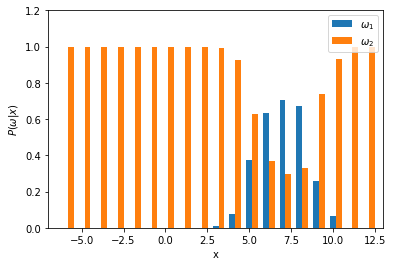

In [40]:
from posterior import posterior

p = posterior(train_x)
width = 0.35
p1 = plt.bar(np.arange(data_range[0], data_range[1] + 1), p.T[:,0], width)
p2 = plt.bar(np.arange(data_range[0], data_range[1] + 1) + width, p.T[:,1], width)
plt.xlabel('x')
plt.ylabel('$P(\omega|x)$')
plt.legend((p1[0], p2[0]), ('$\omega_1$', '$\omega_2$'))
plt.axis([data_range[0] - 1, data_range[1] + 1, 0, 1.2])
plt.show()

In [41]:
#TODO
#compute the number of all the misclassified x using optimal bayes decision rule
C,N = test_x.shape
p_predict = np.zeros(N)
test_err = np.zeros(C)

for j in range(N):
    if p[0][j] > p[1][j]:
        p_predict[j] = 1  # if P(x|w1)>P(x|w2), choose w1
    else:
        p_predict[j] = 2  # if P(x|w2)>P(x|w1), choose w2

C1,N1 = x1_test.shape
C2,N2 = x2_test.shape

for i in range(N1):
    if p_predict[x1_test[0][i]-data_range[0]]!=1:
        test_err[0]+=1

for i in range(N2):
    if p_predict[x2_test[0][i]-data_range[0]]!=2:
        test_err[1]+=1

print test_err.sum()
# begin answer
# end answer


47.0


## Part 3 risk


In [46]:
risk = np.array([[0, 1], [2, 0]])
#TODO
#get the minimal risk using optimal bayes decision rule and risk weights

# begin answer
r = 0
for j in range(N):
        if p[1][j]*risk[0][1] < p[0][j]*risk[1][0]:
            r += p[1][j]*risk[0][1]
        else:
            r += p[0][j]*risk[1][0]
print r
# end answer

2.4443535113871886
